In [14]:
# conda install -c conda-forge datetime tensorflow pandas matplotlib scikit-learn numpy seaborn
from datetime import datetime 
#import tensorflow as tf 
#from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn as sns 
import os

In [15]:
stock_folder = r'c:\DataExport'

# Symbol of stock declared
symbol = 'VN30F1M'
# Joining the symbol with the stock folder using os.path.join
try:
    # If file exists, read the file
    file_name = os.path.join(stock_folder, symbol + '.csv')
    stock = pd.read_csv(file_name)
    print(stock.head())
except FileNotFoundError:
    # If file does not exist, print an error message
    print('File not found')
    exit()

    symbol    date   open   high    low  close  volume           RSI  \
0  VN30F1M  170810  757.9  757.9  745.5  745.9     367 -1.000000e+10   
1  VN30F1M  170811  746.0  746.4  743.4  745.7     510 -1.000000e+10   
2  VN30F1M  170814  745.9  748.9  745.7  748.9     707 -1.000000e+10   
3  VN30F1M  170815  750.3  750.9  748.0  748.0     946 -1.000000e+10   
4  VN30F1M  170816  747.7  748.4  745.1  748.1    1065 -1.000000e+10   

           MACD        Signal          MA10          MA20         MA100  \
0 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
1 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
2 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
3 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
4 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   

          MA200           MFI      Ultimate  
0 -1.000000e+10 -1.000000e+10 -1.000000e+10  
1 -1.000000e+10 -1.00000

In [16]:
def convert_date(x):
    x = str(x).zfill(6)  # Pad with leading zeros if necessary
    return datetime.strptime(x, '%y%m%d')

stock['date'] = stock['date'].apply(convert_date)

print(stock.head())

    symbol       date   open   high    low  close  volume           RSI  \
0  VN30F1M 2017-08-10  757.9  757.9  745.5  745.9     367 -1.000000e+10   
1  VN30F1M 2017-08-11  746.0  746.4  743.4  745.7     510 -1.000000e+10   
2  VN30F1M 2017-08-14  745.9  748.9  745.7  748.9     707 -1.000000e+10   
3  VN30F1M 2017-08-15  750.3  750.9  748.0  748.0     946 -1.000000e+10   
4  VN30F1M 2017-08-16  747.7  748.4  745.1  748.1    1065 -1.000000e+10   

           MACD        Signal          MA10          MA20         MA100  \
0 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
1 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
2 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
3 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
4 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   

          MA200           MFI      Ultimate  
0 -1.000000e+10 -1.000000e+10 -1.000000e+10  
1 -1.0

In [17]:
stock.shape

(1813, 16)

In [18]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   symbol    1813 non-null   object        
 1   date      1813 non-null   datetime64[ns]
 2   open      1813 non-null   float64       
 3   high      1813 non-null   float64       
 4   low       1813 non-null   float64       
 5   close     1813 non-null   float64       
 6   volume    1813 non-null   int64         
 7   RSI       1813 non-null   float64       
 8   MACD      1813 non-null   float64       
 9   Signal    1813 non-null   float64       
 10  MA10      1813 non-null   float64       
 11  MA20      1813 non-null   float64       
 12  MA100     1813 non-null   float64       
 13  MA200     1813 non-null   float64       
 14  MFI       1813 non-null   float64       
 15  Ultimate  1813 non-null   float64       
dtypes: datetime64[ns](1), float64(13), int64(1), object(1)
memor

In [19]:
stock.describe()

,date,open,high,low,close,volume,RSI,MACD,Signal,MA10,MA20,MA100,MA200,MFI,Ultimate
count,1813,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1.813000e+03,1.813000e+03,1.813000e+03,1.813000e+03,1.813000e+03,1.813000e+03,1.813000e+03,1.813000e+03,1.813000e+03
mean,2021-03-25 00:43:41.070049792,1088.838996,1097.144291,1079.800221,1088.687369,162102.846111,-7.722002e+07,-1.434087e+08,-1.930502e+08,-4.964039e+07,-1.047976e+08,-5.460552e+08,-1.097627e+09,-7.722002e+07,-1.599558e+08
min,2017-08-10 00:00:00,583.000000,601.200000,560.000000,578.700000,367.000000,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
25%,2019-06-06 00:00:00,893.000000,896.800000,885.400000,892.100000,90673.000000,4.441630e+01,-6.809644e+00,-8.434466e+00,8.912100e+02,8.915250e+02,8.882380e+02,8.840015e+02,4.172183e+01,4.482933e+01
50%,2021-03-25 00:00:00,1059.200000,1068.500000,1050.000000,1058.000000,150410.000000,5.344590e+01,3.380255e+00,3.879395e+00,1.057540e+03,1.059450e+03,1.052653e+03,1.008674e+03,5.341823e+01,5.257267e+01
75%,2023-01-12 00:00:00,1265.000000,1274.000000,1256.100000,1266.000000,214820.000000,6.256944e+01,1.306540e+01,1.584347e+01,1.262920e+03,1.263040e+03,1.238210e+03,1.201056e+03,6.401477e+01,5.949902e+01
max,2024-11-07 00:00:00,1566.000000,1577.000000,1561.500000,1568.000000,644594.000000,9.508528e+01,5.077055e+01,5.889856e+01,1.541870e+03,1.532655e+03,1.518960e+03,1.493530e+03,1.000000e+02,8.309554e+01
std,NaN,227.960686,229.029194,226.281841,227.666243,101530.474930,8.755916e+08,1.189244e+09,1.376328e+09,7.030101e+08,1.018615e+09,2.272715e+09,3.126802e+09,8.755916e+08,1.254927e+09


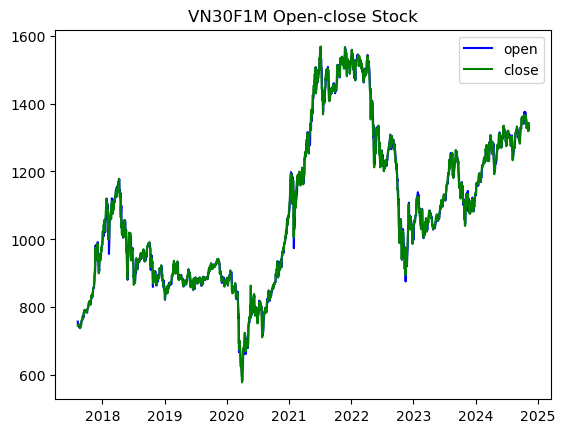

In [20]:
plt.plot(stock['date'], 
		stock['open'], 
		color="blue", 
		label="open") 
plt.plot(stock['date'], 
		stock['close'], 
		color="green", 
		label="close") 
plt.title(symbol + " " + "Open-close Stock") 
plt.legend() 

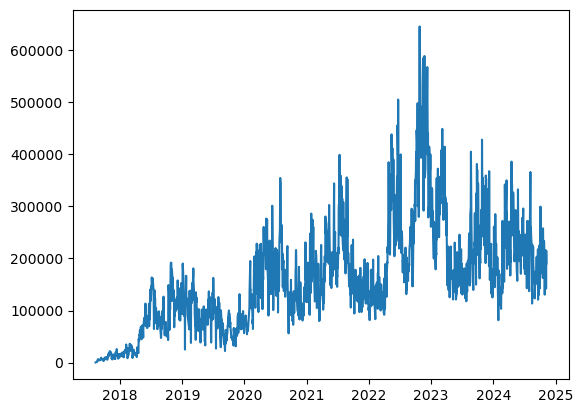

In [21]:
plt.plot(stock['date'], 
		stock['volume']) 
plt.show()


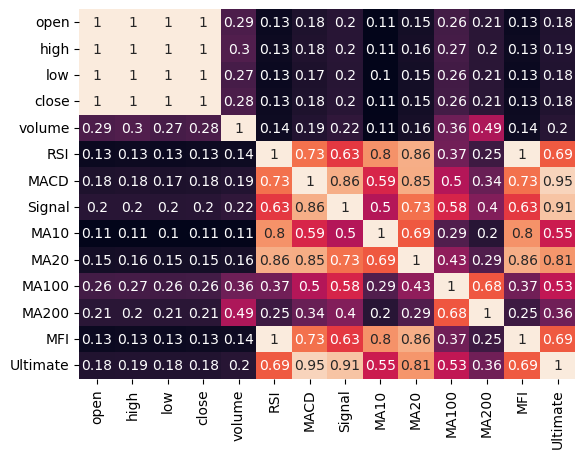

In [22]:
# sns heatmap of correlation exculded symbol and date
headmap_show = stock.drop(['symbol', 'date'], axis=1)
sns.heatmap(headmap_show.corr(), 
			annot=True, 
			cbar=False) 
plt.show()

In [23]:
stock.head()

,symbol,date,open,high,low,close,volume,RSI,MACD,Signal,MA10,MA20,MA100,MA200,MFI,Ultimate
0,VN30F1M,2017-08-10,757.9,757.9,745.5,745.9,367,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
1,VN30F1M,2017-08-11,746.0,746.4,743.4,745.7,510,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
2,VN30F1M,2017-08-14,745.9,748.9,745.7,748.9,707,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
3,VN30F1M,2017-08-15,750.3,750.9,748.0,748.0,946,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
4,VN30F1M,2017-08-16,747.7,748.4,745.1,748.1,1065,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10


Mean Squared Error: 88.75039761538076


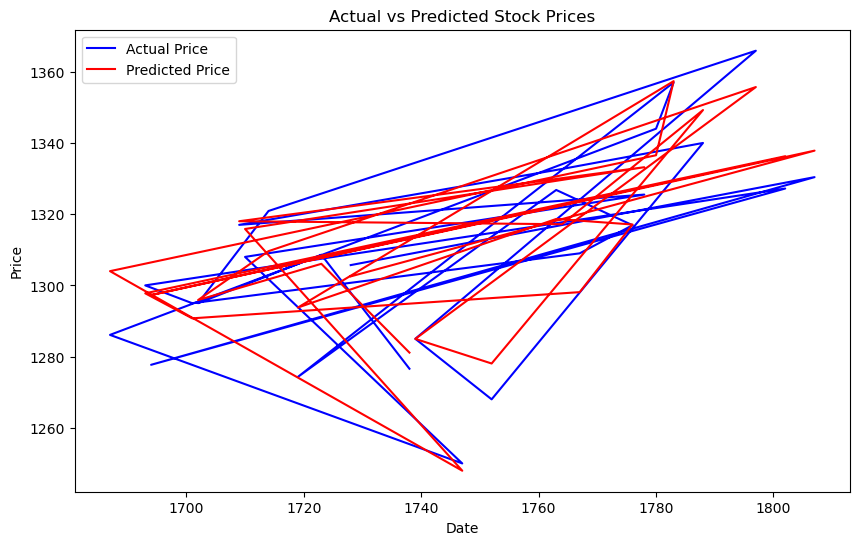

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Filter stock date from from last 6 months to now
data = stock.loc[stock['date'] > stock['date'].max() - pd.DateOffset(months=6)]

# Drop rows with NaN values (due to moving averages and RSI)
data = data.dropna()

# Define the target variable as the next day's closing price
data['Target'] = data['close'].shift(-1)

# Drop the last row, which has NaN in the 'Target' column
data = data.dropna(subset=['Target'])

# Feature set (SMA, EMA, RSI)
X = data[['volume', 'MACD', 'Signal', 'MA10', 'MA20', 'MA100', 'MA200', 'RSI', 'MFI', 'Ultimate']]
y = data['Target']

# Split into training and testing stock
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
# Print current stock price and current predicted price
current_price = stock.iloc[-1]['close']
current_predicted_price = model.predict([X.iloc[-1]])[0]
print(f"Current Price: {current_price:.2f}")
print(f"Current Predicted Price: {current_predicted_price:.2f}")

Current Price: 1334.70
Current Predicted Price: 1334.68


c:\Users\PC\anaconda3\envs\pyenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [26]:
import pandas as pd

# Assuming 'stock' DataFrame is already defined and has 'date' and 'open' columns

# Make a new dataframe that clone from stock to test the idea
sample = stock.copy()

# Add a new column for the weekday
sample['weekday'] = sample['date'].dt.day_name()

# Add a new column for the week number
sample['week_number'] = sample['date'].dt.isocalendar().week

# Find the minimum and maximum open prices for each week
weekly_min_open = sample.groupby(['week_number'])['open'].idxmin()
weekly_max_open = sample.groupby(['week_number'])['open'].idxmax()

# Get the weekdays for the minimum and maximum open prices
min_open_weekdays = sample.loc[weekly_min_open, 'weekday']
max_open_weekdays = sample.loc[weekly_max_open, 'weekday']

# Count the occurrences of each weekday being the minimum or maximum open price of the week
min_open_counts = min_open_weekdays.value_counts()
max_open_counts = max_open_weekdays.value_counts()

# Determine the weekday with the highest count for being the lowest and highest open price of the week
most_common_min_open_day = min_open_counts.idxmax()
most_common_max_open_day = max_open_counts.idxmax()

print(f"Weekday with the highest chance of having the lowest open price: {most_common_min_open_day}")
print(f"Weekday with the highest chance of having the highest open price: {most_common_max_open_day}")

Weekday with the highest chance of having the lowest open price: Monday
Weekday with the highest chance of having the highest open price: Monday
